# Proj_06_NaiveBayes_MoviewReviews 

Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('data/moviereviews.csv')
df.sample(10)

,label,review
1938,neg,capsule : liebes meets tod . \r\nthis was a fi...
121,pos,in brief : best bleak comedy film since heathe...
524,pos,as feel-good formulaic as it may be in its own...
1320,pos,plot : a peculiar french girl grows up lonely ...
1318,pos,"the last steve martin film i saw , the spanish..."
248,pos,"synopsis : an attractive mute makeup artist , ..."
1665,pos,catherine deane ( jennifer lopez ) is a psycho...
244,neg,>from writer and director darren stein comes j...
1956,neg,this is the first film in what would become th...
1703,pos,i didn't realize how apt the name of this movi...


**TASK: Check to see if there are any missing values in the dataframe.**

In [16]:
df = df.dropna()

**TASK: Remove any reviews that are NaN**

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [31]:
df = df[~df['review'].str.isspace()]

In [32]:
(df['review']=='').sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [34]:
df.label.value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

cv_neg_matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), cv_neg_matrix.sum(axis=0).tolist()[0] )
print(sorted(freqs, key=lambda x: -x[1])[:20], '\n')

cv_pos_matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), cv_pos_matrix.sum(axis=0).tolist()[0] )
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)] 

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [129]:
X = df['review']
y = df['label']

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [140]:
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                 ('svc', LinearSVC())])

In [141]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [142]:
from sklearn.metrics import plot_confusion_matrix, classification_report

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



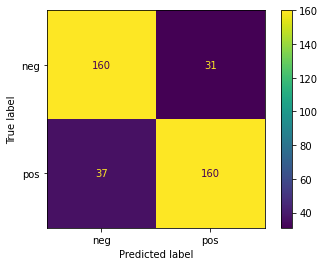

In [143]:
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(pipe, X_test, y_test);